In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

Using TensorFlow backend.


In [46]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [47]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [10]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

Epoch 1/1
190820/190820 [==============================] - 17s - loss: 0.0290 - acc: 0.9982    


In [12]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

Loss:  [0.025552582303535978, 0.99841467436985964]


In [37]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


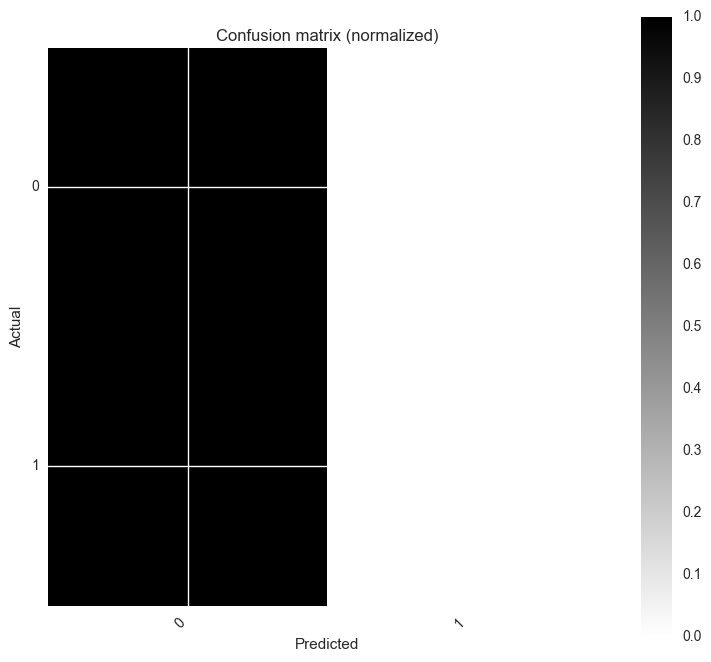

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.99841467437
95% CI: (0.99813896508104838, 0.99865884550190664)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93838         149
N: Condition negative                         149       93838
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93838           0
TN: True Negative                               0       93838
FP: False Positive                            149           0
FN: False Negative                              0         149
TPR: (

In [40]:
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

# Oversampling with gaussian noise (commented out)

In [55]:
# noise = np.random.normal(0,.1,30)

# # 0 is the mean of the normal distribution you are choosing from
# # 1 is the standard deviation of the normal distribution
# # 100 is the number of elements you get in array noise
# noise

In [56]:
# frauds.head()

In [57]:
# for i in range(300):
#     #frauds.iloc[i] += noise[i]
#     frauds.append(frauds.iloc[i % 30] + noise[i % 30])

In [58]:
# NEED TO ADD A (DIFFERENT BUT SIMILAR) RANDOM NOISE ARRAY TO EVERY ROW OF FRAUDS TABLE (WITHOUT CLASS)
# THEN ADD THIS TO ORIGINAL FRAUDS TABLE (MAKING MORE DATA POINTS)
# AND RE SPLIT DATA AND DO NEURAL NET
# ALSO TRY FORCING 50% OF FRAUDS INTO TRAINING SET AND 50% INTO TEST SET

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[-2.31175794,  0.09428517,  0.32421216, ..., -1.53825202,
        -0.0080403 ,  0.6380986 ],
       [-2.21381655,  0.48437934,  0.3050001 , ..., -0.81437585,
        -0.42787532,  0.73902717],
       [-2.41268729, -0.24558476, -0.13943409, ..., -1.91225074,
        -1.19001361,  0.380131  ],
       ..., 
       [ 7.97999808,  1.60348163,  0.51055718, ..., -0.13385151,
        -1.10524644,  0.06763075],
       [ 7.95122073,  2.45899403,  1.88423402, ...,  0.87864537,
        -0.20736878, -0.12618701],
       [ 0.44360529,  1.23398775,  0.12835514, ..., -0.3849596 ,
         0.044379  ,  0.52628699]])

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.as_matrix(), test_size=0.33, random_state=42)

In [53]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='tanh')) 
model2.add(Dense(27, activation='tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(2, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.fit(X2_train, y2_train, epochs=2)

Epoch 1/2
380982/380982 [==============================] - 49s - loss: 0.0509 - acc: 0.9931    
Epoch 2/2
380982/380982 [==============================] - 49s - loss: 0.0082 - acc: 0.9973    


In [59]:
print("Loss: ", model2.evaluate(X2_test, y2_test, verbose=0))

Loss:  [0.0071204318427581211, 0.99786302012278305]


In [68]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y2_test)

In [69]:
np.setdiff1d(y2_predicted, y2_correct)

array([], dtype=float32)

In [70]:
false_neg = 0
false_pos = 0
incorrect = 0
total = len(y2_test)
for i in range(len(y2_test)):
    if y2_predicted[i] != y2_correct[i]:
        incorrect += 1
        if y2_correct[i] == 1 and y2_predicted[i] == 0:
            false_neg += 1
        else:
            false_pos += 1
        #print('Wrongly predicted: ', y2_predicted[i])
inaccuracy = incorrect / total
print('Inaccuracy:', inaccuracy)
print('Accuracy:', 1 - inaccuracy)
print('False negative rate:', false_neg/incorrect)
print('False positive rate:', false_pos / incorrect )
print('false negatives/total:', false_neg/total)

Inaccuracy: 0.002136979877216917
Accuracy: 0.997863020122783
False negative rate: 0.19201995012468828
False positive rate: 0.8079800498753117
false negatives/total: 0.00041034276944065486


In [71]:
print(incorrect)

401


Confusion matrix:
Predicted    0.0    1.0  __all__
Actual                          
0          93451    324    93775
1             77  93796    93873
__all__    93528  94120   187648


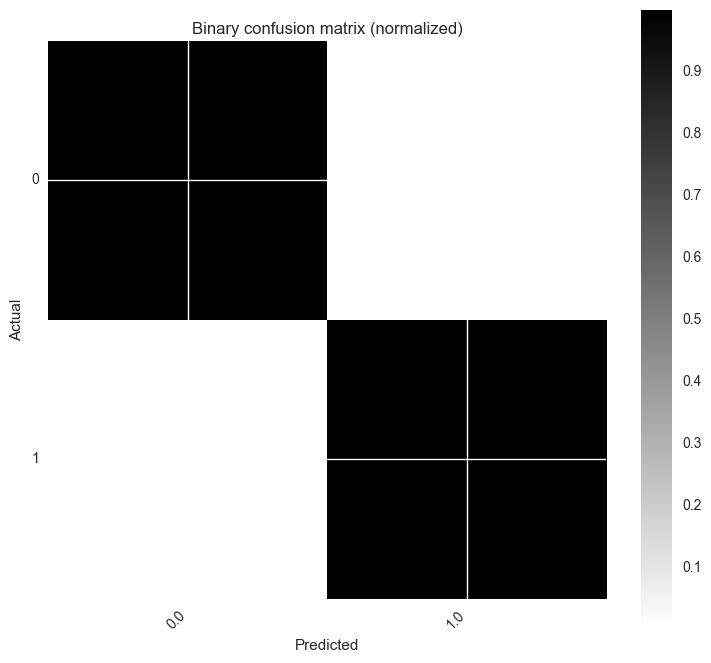

population: 187648
P: 93873
N: 93775
PositiveTest: 94120
NegativeTest: 93528
TP: 93796
TN: 93451
FP: 324
FN: 77
TPR: 0.999179742844
TNR: 0.996544921354
PPV: 0.99655758606
NPV: 0.999176717133
FPR: 0.00345507864569
FDR: 0.00344241393965
FNR: 0.000820257155945
ACC: 0.997863020123
F1_score: 0.997866941854
MCC: 4.5543815985
informedness: 0.995724664198
markedness: 0.995734303193
prevalence: 0.500261127217
LRP: 289.191606127
LRN: 0.000823101034753
DOR: 351343.99535
FOR: 0.000823282867163


In [72]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()